# Lower bound for smooth and convex functions

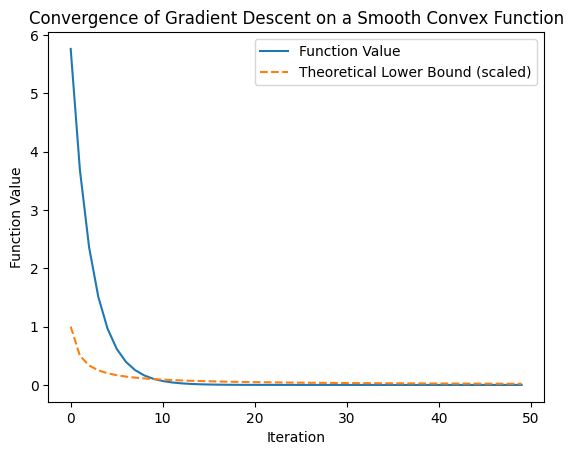

Gradient Descent found minimum near x = 3.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Smooth and convex function: f(x) = (x-3)^2 (Convex parabola)
def f(x):
    return (x - 3) ** 2


# Gradient of f
def grad_f(x):
    return 2 * (x - 3)


# Gradient descent to minimize f(x)
def gradient_descent(lr, steps, x0):
    x = x0
    values = []
    for _ in range(steps):
        x = x - lr * grad_f(x)
        values.append(f(x))
    return values, x


# Parameters
learning_rate = 0.1
iterations = 50
initial_x = 0

# Run Gradient Descent
values, optimal_x = gradient_descent(learning_rate, iterations, initial_x)

# Theoretical lower bound for iteration k: O(1/k) for smooth convex functions
lower_bound = [1 / (k + 1) for k in range(iterations)]  # Scaled for illustration

# Plot function value over iterations and lower bound
plt.plot(values, label="Function Value")
plt.plot(lower_bound, label="Theoretical Lower Bound (scaled)", linestyle="dashed")
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Convergence of Gradient Descent on a Smooth Convex Function")
plt.legend()
plt.show()

print(f"Gradient Descent found minimum near x = {optimal_x:.4f}")

# Weight initialization methods and their performance

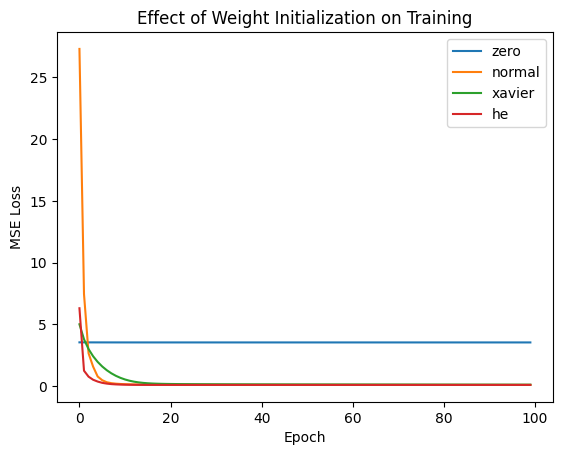

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# ----- Synthetic dataset: y = 2x + noise -----
torch.manual_seed(0)
n_samples = 256
X = torch.randn(n_samples, 1)
y = 2 * X + 0.3 * torch.randn(n_samples, 1)


# ----- Simple 2-layer network -----
class SimpleNet(nn.Module):
    def __init__(self, init_type="xavier"):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 1)
        self.init_weights(init_type)

    def init_weights(self, init_type):
        if init_type == "zero":
            nn.init.zeros_(self.fc1.weight)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.weight)
            nn.init.zeros_(self.fc2.bias)
        elif init_type == "normal":
            nn.init.normal_(self.fc1.weight, mean=0.0, std=1.0)
            nn.init.normal_(self.fc2.weight, mean=0.0, std=1.0)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.bias)
        elif init_type == "xavier":
            nn.init.xavier_uniform_(self.fc1.weight)
            nn.init.xavier_uniform_(self.fc2.weight)
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.bias)
        elif init_type == "he":
            nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity="relu")
            nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity="relu")
            nn.init.zeros_(self.fc1.bias)
            nn.init.zeros_(self.fc2.bias)
        else:
            raise ValueError("Unknown init_type")

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


def train_model(init_type, epochs=100, lr=0.05):
    model = SimpleNet(init_type)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses


# ----- Run experiments -----
inits = ["zero", "normal", "xavier", "he"]
results = {}

for init in inits:
    results[init] = train_model(init, epochs=100)

# ----- Plot training loss -----
for init in inits:
    plt.plot(results[init], label=init)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Effect of Weight Initialization on Training")
plt.legend()
plt.show()

# Momentum-based Optimization

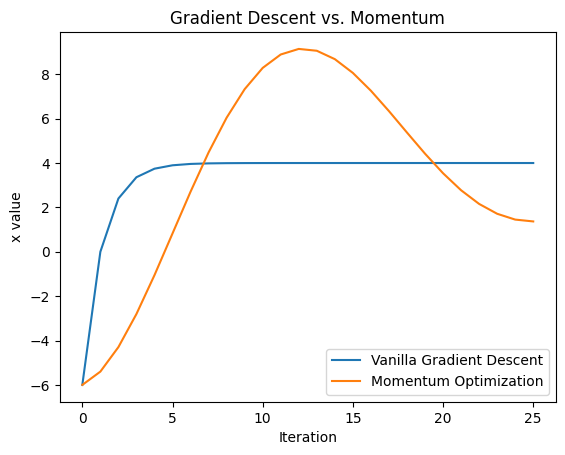

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Smooth convex function and gradient
def f(x):
    return (x - 4) ** 2


def grad_f(x):
    return 2 * (x - 4)


# Vanilla Gradient Descent
def gradient_descent(steps, lr, x0):
    x = x0
    trajectory = [x]
    for _ in range(steps):
        x -= lr * grad_f(x)
        trajectory.append(x)
    return trajectory


# Momentum-based Gradient Descent
def momentum_optimization(steps, lr, beta, x0):
    x = x0
    v = 0
    trajectory = [x]
    for _ in range(steps):
        v = beta * v + (1 - beta) * grad_f(x)
        x -= lr * v
        trajectory.append(x)
    return trajectory


# Hyperparameters
steps = 25
learning_rate = 0.3
momentum = 0.9
init_position = -6

# Run both optimizers
vanilla_trace = gradient_descent(steps, learning_rate, init_position)
momentum_trace = momentum_optimization(steps, learning_rate, momentum, init_position)

# Plot
plt.plot(vanilla_trace, label="Vanilla Gradient Descent")
plt.plot(momentum_trace, label="Momentum Optimization")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent vs. Momentum")
plt.legend()
plt.show()

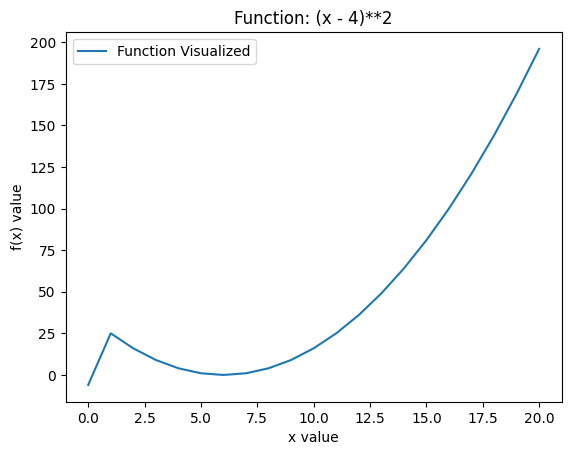

In [6]:
def func_visual(steps, lr, beta, x0):
    x = x0
    trajectory = [x]
    for step in range(steps):
        x = f(step)
        trajectory.append(x)
    return trajectory


func_trace = func_visual(steps, learning_rate, momentum, init_position)

plt.plot(func_trace, label="Function Visualized")
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.title("Function: (x - 4)**2")
plt.legend()
plt.show()

# Nesterov Accelerated Gradient

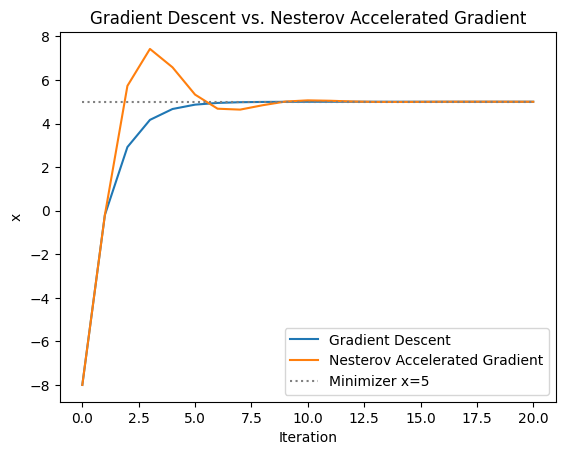

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return (x - 5) ** 2


def grad_f(x):
    return 2 * (x - 5)


# Vanilla Gradient Descent
def gradient_descent(lr, steps, x0):
    path = [x0]
    x = x0
    for _ in range(steps):
        x = x - lr * grad_f(x)
        path.append(x)
    return path


# Nesterov Accelerated Gradient
def nesterov(lr, steps, x0, mu):
    path = [x0]
    x = x0
    v = 0
    for _ in range(steps):
        # Lookahead: gradient at the future position
        x_ahead = x - mu * v
        g = grad_f(x_ahead)
        v = mu * v + lr * g
        x = x - v
        path.append(x)
    return path


# Parameters
init_x = -8
learning_rate = 0.3
momentum = 0.9
steps = 20

gd_path = gradient_descent(learning_rate, steps, init_x)
nag_path = nesterov(learning_rate, steps, init_x, momentum)

plt.plot(gd_path, label="Gradient Descent")
plt.plot(nag_path, label="Nesterov Accelerated Gradient")
plt.hlines(5, 0, steps, color="gray", linestyle="dotted", label="Minimizer x=5")
plt.xlabel("Iteration")
plt.ylabel("x")
plt.title("Gradient Descent vs. Nesterov Accelerated Gradient")
plt.legend()
plt.show()

# Adagrad for Classification

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Test accuracy (Adagrad-like): 0.937


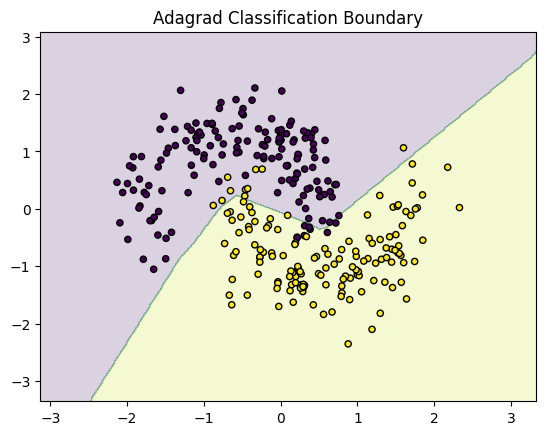

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create synthetic classification data (2D moons)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)  # Improve optimization

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# MLPClassifier with Adagrad (SGD with adagrad learning schedule)
clf = MLPClassifier(
    hidden_layer_sizes=(16,),  # Small NN
    solver="sgd",
    learning_rate="adaptive",
    learning_rate_init=0.1,
    max_iter=100,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
    tol=1e-3,
)

clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy (Adagrad-like): {accuracy:.3f}")


# Plot decision boundary
def plot_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title("Adagrad Classification Boundary")
    plt.show()


plot_boundary(clf, X_test, y_test)

Adagrad Test Accuracy: 0.980


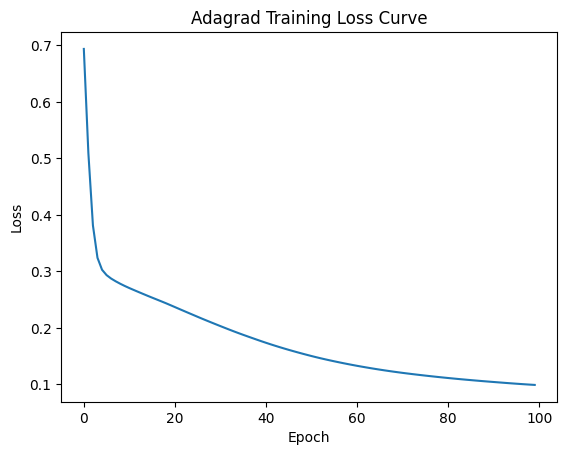

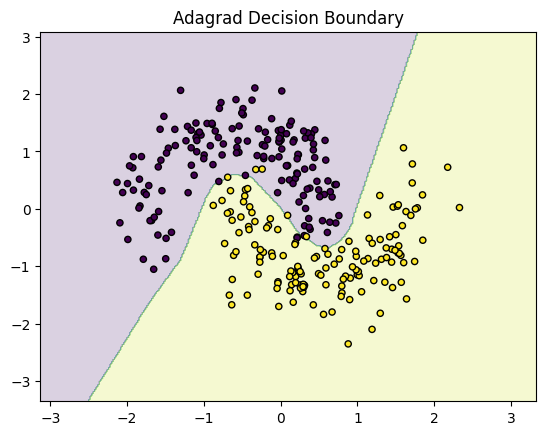

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ----- Same dataset as before -----
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Convert to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
y_test_t = torch.tensor(y_test, dtype=torch.long)


# ----- Neural Network Definition -----
class SimpleNN(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        )

    def forward(self, x):
        return self.net(x)


model = SimpleNN()

# ----- Adagrad optimizer -----
optimizer = optim.Adagrad(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()

# ----- Training loop -----
epochs = 100
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    out = model(X_train_t)
    loss = criterion(out, y_train_t)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# ----- Evaluation -----
model.eval()
with torch.no_grad():
    logits = model(X_test_t)
    preds = torch.argmax(logits, axis=1)
test_acc = accuracy_score(y_test, preds.numpy())
print(f"Adagrad Test Accuracy: {test_acc:.3f}")

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Adagrad Training Loss Curve")
plt.show()


# ----- Decision Boundary Visualization -----
def plot_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    data = np.c_[xx.ravel(), yy.ravel()]
    with torch.no_grad():
        preds = torch.argmax(
            model(torch.tensor(data, dtype=torch.float32)), axis=1
        ).numpy()
    plt.contourf(xx, yy, preds.reshape(xx.shape), alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=20)
    plt.title("Adagrad Decision Boundary")
    plt.show()


plot_boundary(model, X_test, y_test)